# Practical Example

 In this exercise we will scrape information from the offshoreleaks database, by The International Consortium of Investigative Journalists. It contains information on companies and individuals with offshore accounts. 
 
 **Disclaimer from the ICIJ Offshore Leaks database**: There are legitimate uses for offshore companies and trusts. We do not intend to suggest or imply that any people, companies or other entities included in the ICIJ Offshore Leaks Database have broken the law or otherwise acted improperly. Many people and entities have the same or similar names. We suggest you confirm the identities of any individuals or entities located in the database based on addresses or other identifiable information. 



In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from IPython.core.display import display, HTML

In [4]:
base_url = "https://offshoreleaks.icij.org"
display(HTML(base_url)) # Displays simpler version of the website

# Data API

The website allows us to use their API to retrieve specific data


In [36]:
country = "AND" # Data from Andorra (or any other country)
url = f"https://offshoreleaks.icij.org/search?utf8=%E2%9C%93&q=&c={country}&j=&e=&commit=Search"

display(HTML(url))

,Incorporation,Jurisdiction,Linked To,Data From
GATES AND PARTNERS,,,United Kingdom,Panama Papers
BLUMENTHAL RICHTER AND SUMET,,,Thailand,Panama Papers
SAVITZ AND CO.,,,United Kingdom,Panama Papers
ARRIOJA AND TSIROYANNIS,,,Monaco,Panama Papers
Jerry Dodson and/or Marjorie Dodson and/or Bret J. Dodson,,,,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers
TRINITYMANAGEMENT AND SERVICES INC.,,,,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers


In [37]:
# How to get the data?
# Data is inside a <table>
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find_all('table')[0]
table

<table class="search_results">
<tr>
<th></th>
<th class="incorporation">Incorporation</th>
<th class="jurisdiction">Jurisdiction</th>
<th class="country">Linked To</th>
<th class="source">Data From</th>
</tr>
<tr>
<td class="description">
<a href="/nodes/11006211">
      GATES AND PARTNERS
    </a>
</td>
<td class="incorporation"></td>
<td class="jurisdiction"></td>
<td class="country">United Kingdom</td>
<td class="source"><a href="https://panamapapers.icij.org">Panama Papers</a></td>
</tr>
<tr>
<td class="description">
<a href="/nodes/11007254">
      BLUMENTHAL RICHTER AND SUMET
    </a>
</td>
<td class="incorporation"></td>
<td class="jurisdiction"></td>
<td class="country">Thailand</td>
<td class="source"><a href="https://panamapapers.icij.org">Panama Papers</a></td>
</tr>
<tr>
<td class="description">
<a href="/nodes/11008546">
      SAVITZ AND CO.
    </a>
</td>
<td class="incorporation"></td>
<td class="jurisdiction"></td>
<td class="country">United Kingdom</td>
<td class="sour

In [15]:
rows = table.find_all('tr')
# Inspect the data
for row in rows:
    print(row)

<tr>
<th></th>
<th class="incorporation">Incorporation</th>
<th class="jurisdiction">Jurisdiction</th>
<th class="country">Linked To</th>
<th class="source">Data From</th>
</tr>
<tr>
<td class="description">
<a href="/nodes/11006211">
      GATES AND PARTNERS
    </a>
</td>
<td class="incorporation"></td>
<td class="jurisdiction"></td>
<td class="country">United Kingdom</td>
<td class="source"><a href="https://panamapapers.icij.org">Panama Papers</a></td>
</tr>
<tr>
<td class="description">
<a href="/nodes/11007254">
      BLUMENTHAL RICHTER AND SUMET
    </a>
</td>
<td class="incorporation"></td>
<td class="jurisdiction"></td>
<td class="country">Thailand</td>
<td class="source"><a href="https://panamapapers.icij.org">Panama Papers</a></td>
</tr>
<tr>
<td class="description">
<a href="/nodes/11008546">
      SAVITZ AND CO.
    </a>
</td>
<td class="incorporation"></td>
<td class="jurisdiction"></td>
<td class="country">United Kingdom</td>
<td class="source"><a href="https://panamapape

In [24]:
descriptions   = []
incorporations = []
jurisdictions  = []
countries      = []
sources        = []
for row in rows[1:]:
    
    descriptions.append(  row.find_all('td', {'class' : 'description'})[0].text)
    incorporations.append(row.find_all('td', {'class' : 'incorporation'})[0].text)
    jurisdictions.append( row.find_all('td', {'class' : 'jurisdiction'})[0].text)
    countries.append(     row.find_all('td', {'class' : 'country'})[0].text)
    sources.append(       row.find_all('td', {'class' : 'source'})[0].text)

df = pd.DataFrame.from_dict({'Description'   : descriptions,
                             'Incorporation' : incorporations,
                             'Jurisdiction'  : jurisdictions,
                             'Country'       : countries,
                             'Source'        : sources})
for col in df.columns:
    df[col] = df[col].apply(lambda x : x.replace("\n", ""))
df.head(10)

,Description,Incorporation,Jurisdiction,Country,Source
0,GATES AND PARTNERS,,,United Kingdom,Panama Papers
1,BLUMENTHAL RICHTER AND SUMET,,,Thailand,Panama Papers
2,SAVITZ AND CO.,,,United Kingdom,Panama Papers
3,ARRIOJA AND TSIROYANNIS,,,Monaco,Panama Papers
4,Jerry Dodson and/or Marjorie Dodson and/...,,,,Panama Papers
5,CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
6,CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers
7,TRINITYMANAGEMENT AND SERVICES INC.,,,,Panama Papers
8,CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers
9,CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers


# Get all the information included in **More Results**

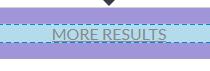


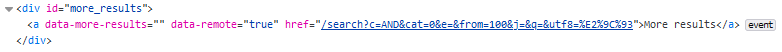

In [25]:
country = "AND"
url_more = f"/search?c={country}&cat=0&e=&from=100&j=&q=&utf8=%E2%9C%93" #From tells the server from where to reload the result

In [28]:
# How does the request look like
display(HTML(base_url+url_more))

,Incorporation,Jurisdiction,Linked To,Data From
PEARCE AND AOIFE HUGHES,,,Ireland,Panama Papers
MARZIO AND JUDITH KRAVOS,,,Switzerland,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
Murdoch and Company,,,Bermuda,Panama Papers
Murdoch and Company,,,Bermuda,Panama Papers
Murdoch and Company,,,Bermuda,Panama Papers
Murdoch and Company,,,Bermuda,Panama Papers


# TODO: 

## Write a code that collects **all** the data from the website for a specific country

In [49]:
country = "AND"
descriptions   = []
incorporations = []
jurisdictions  = []
countries      = []
sources        = []

url = base_url + f"/search?utf8=%E2%9C%93&q=&c={country}&j=&e=&commit=Search"
while True:
    print(f"Trying url {url}")
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    table = soup.find_all('table')[0]
    rows = table.find_all('tr')
    
    for row in rows[1:]:
        descriptions.append(  row.find_all('td', {'class' : 'description'})[0].text)
        incorporations.append(row.find_all('td', {'class' : 'incorporation'})[0].text)
        jurisdictions.append( row.find_all('td', {'class' : 'jurisdiction'})[0].text)
        countries.append(     row.find_all('td', {'class' : 'country'})[0].text)
        sources.append(       row.find_all('td', {'class' : 'source'})[0].text)
        
    try:
        link_next = soup.find_all('div', {'id' : 'more_results'})[0].find_all('a')[0]['href']

        url = base_url + link_next
        
        
    except Exception as e:
        print(e)
        break
        
df = pd.DataFrame.from_dict({'Description'   : descriptions,
                             'Incorporation' : incorporations,
                             'Jurisdiction'  : jurisdictions,
                             'Country'       : countries,
                             'Source'        : sources})
for col in df.columns:
    df[col] = df[col].apply(lambda x : x.replace("\n", ""))
df.head(10)

Trying url https://offshoreleaks.icij.org/search?utf8=%E2%9C%93&q=&c=AND&j=&e=&commit=Search
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=8700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=8800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=8900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=9600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=17900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=18000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=18100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=18200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=25900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=26800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=34500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=34600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=34700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=34800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=34900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=35000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=35100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=35200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=35300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=35400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=43900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=44000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=51700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=51800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=51900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=52600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=60900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=61000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=61100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=61200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=68900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=69800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=77500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=77600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=77700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=77800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=77900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=78000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=78100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=78200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=78300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=78400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86100&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86200&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86300&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86400&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86500&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86600&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86700&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86800&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=86900&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.org/search?c=AND&cat=0&e=&from=87000&j=&q=&utf8=%E2%9C%93
Trying url https://offshoreleaks.icij.or

,Description,Incorporation,Jurisdiction,Country,Source
0,GATES AND PARTNERS,,,United Kingdom,Panama Papers
1,BLUMENTHAL RICHTER AND SUMET,,,Thailand,Panama Papers
2,SAVITZ AND CO.,,,United Kingdom,Panama Papers
3,ARRIOJA AND TSIROYANNIS,,,Monaco,Panama Papers
4,Jerry Dodson and/or Marjorie Dodson and/...,,,,Panama Papers
5,CHARITABLE AND GOODWILL FOUNDATION,,,Panama,Panama Papers
6,CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers
7,TRINITYMANAGEMENT AND SERVICES INC.,,,,Panama Papers
8,CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers
9,CHARITABLE AND GOODWILL FOUNDATION,,,,Panama Papers


In [50]:
len(df)

90012